In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest

In [2]:
rng = np.random.RandomState(42)

#학습 데이터 생성
X_train_x = 0.2 * rng.randn(1000, 2)
X_train_y  = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train_x, X_train_y]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
print(X_train)
#테스트 데이터 생성
X_test_x = 0.2 * rng.randn(200, 2)
X_test_y = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test_x, X_test_y]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

margin_max = 1
margin_min = 0.75
# 고장 데이터 생성
X_outliers_1 = rng.uniform(low=margin_min, high=margin_max, size=(5, 2))
X_outliers_3 = rng.uniform(low=-margin_max, high=-margin_min, size=(5, 2))

X_outliers_2 = np.stack((rng.uniform(low=-margin_max, high=-margin_min, size=(5)), rng.uniform(low=0.5, high=1, size=(5))), axis=1)
X_outliers_4 = np.stack((rng.uniform(low=margin_min, high=margin_max, size=(5)), rng.uniform(low=-1, high=-0.5, size=(5))), axis=1)

X_outliers = np.concatenate((X_outliers_1,X_outliers_2,X_outliers_3,X_outliers_4))

X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

            x1        x2
0     0.099343 -0.027653
1     0.129538  0.304606
2    -0.046831 -0.046827
3     0.315843  0.153487
4    -0.093895  0.108512
...        ...       ...
1995 -0.337837 -0.094253
1996 -0.395098  0.150220
1997 -0.413017  0.005692
1998 -0.415562 -0.064060
1999  0.328676  0.072130

[2000 rows x 2 columns]


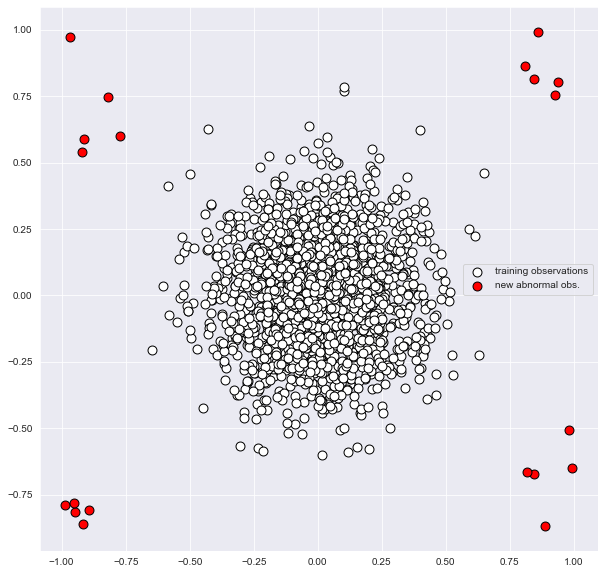

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*4, edgecolor='k', label='training observations')
# p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*4, edgecolor='k', label='new regular obs.')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*4, edgecolor='k', label='new abnormal obs.')

plt.legend()

In [5]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(X_train['x1'].to_numpy().reshape(-1,1))
y_pred_train = clf.predict(X_train['x1'].to_numpy().reshape(-1,1))
y_pred_test = clf.predict(X_test['x1'].to_numpy().reshape(-1,1))
y_pred_outliers = clf.predict(X_outliers['x1'].to_numpy().reshape(-1,1))

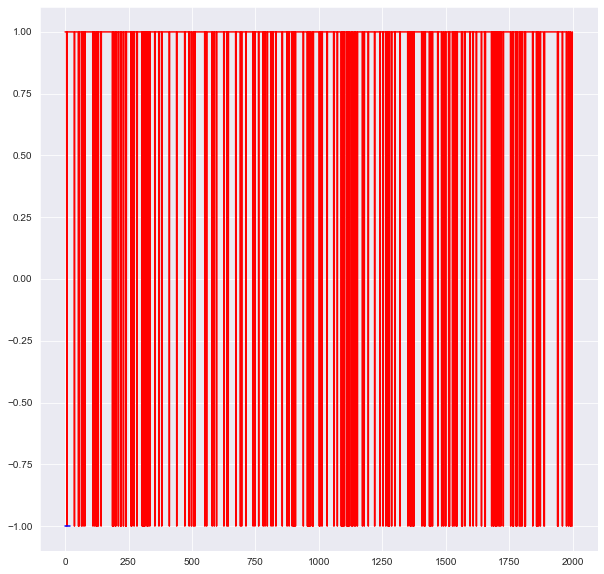

In [6]:
plt.plot(X_train['x1'].index,
         y_pred_train,
          color='red', label="anomaly")



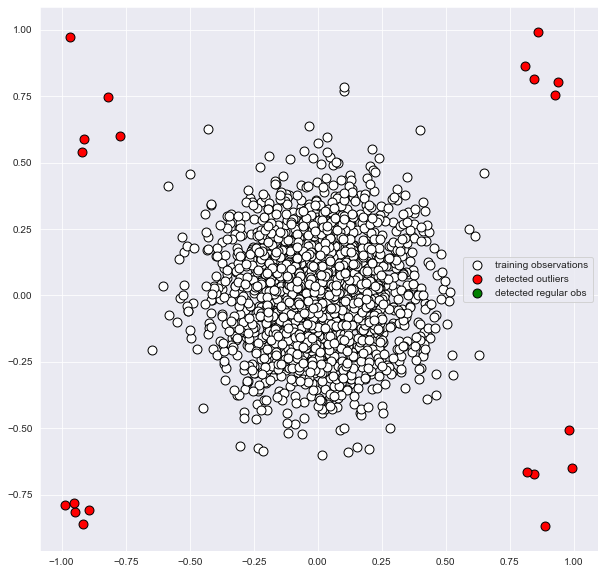

In [37]:
X_outliers = X_outliers.assign(y = y_pred_outliers)
p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

In [8]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.915
이상치 데이터셋에서 정확도: 1.0
